___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
# This codes coppied from ML-8 notebook.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
# The data read from my local .csv file which our course had shared.
df = pd.read_csv("heart.csv").copy()
df.head().T

,0,1,2,3,4
age,63.000,37.000,41.000,56.000,57.000
sex,1.000,1.000,0.000,1.000,0.000
cp,3.000,2.000,1.000,1.000,0.000
trestbps,145.000,130.000,130.000,120.000,120.000
chol,233.000,250.000,204.000,236.000,354.000
fbs,1.000,0.000,0.000,0.000,0.000
restecg,0.000,1.000,0.000,1.000,1.000
thalach,150.000,187.000,172.000,178.000,163.000
exang,0.000,0.000,0.000,0.000,1.000
oldpeak,2.300,3.500,1.400,0.800,0.600


# EDA

In [3]:
# let's check info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Let's check the above information:
df.shape

(303, 14)

In [5]:
# double check is always good.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Let's look at the .value_counts() of a whole dataframe all in one code.
# This code is stolen from C8120-Raife.
for i in df.columns:
    print(f"The column of: '{i}'")
    print(i,df[i].value_counts(), sep= '\n')
    print("")

The column of: 'age'
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

The column of: 'sex'
sex
1    207
0     96
Name: sex, dtype: int64

The column of: 'cp'
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

The column of: 'trestbps'
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165  

In [7]:
# Let's check basic statistical results of our data and make comment.
# We can make lots of comment here. Let me show you hot to read .describe() results.
# 1) We can check min and mox, then we can look %50(Q2) and evaluate difference. So we can roughly find is there any outlier?
# 2) We can compare and evaluate mean and median (mean - %50). So we can say smthng about skewness.
# ... bla bla bla
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [8]:
# Let's see if there is a duplicate value in our data. 
# If there are, we should drop them and reinterpret our dataframe.
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
# Let's check again.
df.duplicated().sum()

0

In [11]:
df.shape

(302, 14)

**cp: chest pain type" column**

In [12]:
# We need to look at "cp: chest pain type" column.
# Angina: It is a term that expresses chest pain caused by insufficient blood and oxygen to the heart.
# Value 0: typical angina
# Value 1: atypical angina
# Value 2: non-anginal pain
# Value 3: asymptomatic
df.cp.value_counts(dropna = False)

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

**trestbps column**

In [13]:
# (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
# bps --> beat perr second
# rest --> regular condition
# Let's look at range and check is there any absurd bps.
print("First 10 bps min to max")
print(df.trestbps.value_counts().sort_index().head(10))
print("Last 10 bps min to max")
print(df.trestbps.value_counts().sort_index().tail(10))

First 10 bps min to max
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
Name: trestbps, dtype: int64
Last 10 bps min to max
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
192     1
200     1
Name: trestbps, dtype: int64


- We've already check all columns, and did not not find any absurd value.

In [14]:
# df = pd.get_dummies(df, drop_first = True)

- ***Dummy variables, is necessary to standardize them?***
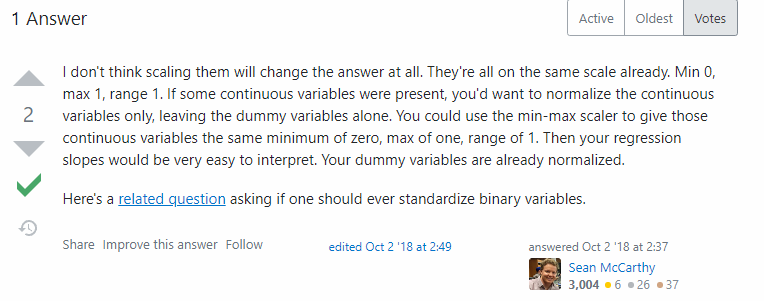

In [15]:
# Let's check corr.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.095,-0.063,0.283,0.207,0.119,-0.112,-0.395,0.093,0.206,-0.164,0.302,0.065,-0.221
sex,-0.095,1.000,-0.052,-0.058,-0.196,0.046,-0.060,-0.046,0.143,0.098,-0.033,0.113,0.211,-0.284
cp,-0.063,-0.052,1.000,0.046,-0.073,0.096,0.042,0.293,-0.393,-0.147,0.117,-0.195,-0.160,0.432
trestbps,0.283,-0.058,0.046,1.000,0.125,0.178,-0.115,-0.048,0.069,0.195,-0.123,0.099,0.063,-0.146
chol,0.207,-0.196,-0.073,0.125,1.000,0.011,-0.148,-0.005,0.064,0.050,0.000,0.087,0.097,-0.081
fbs,0.119,0.046,0.096,0.178,0.011,1.000,-0.083,-0.007,0.025,0.005,-0.059,0.145,-0.033,-0.027
restecg,-0.112,-0.060,0.042,-0.115,-0.148,-0.083,1.000,0.041,-0.069,-0.056,0.090,-0.083,-0.010,0.135
thalach,-0.395,-0.046,0.293,-0.048,-0.005,-0.007,0.041,1.000,-0.377,-0.342,0.385,-0.228,-0.095,0.420
exang,0.093,0.143,-0.393,0.069,0.064,0.025,-0.069,-0.377,1.000,0.287,-0.256,0.125,0.206,-0.436
oldpeak,0.206,0.098,-0.147,0.195,0.050,0.005,-0.056,-0.342,0.287,1.000,-0.576,0.237,0.209,-0.429


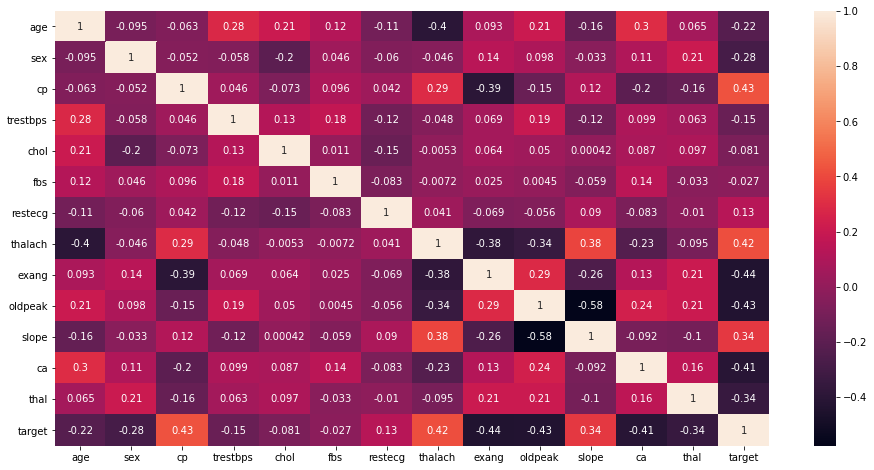

In [16]:
# make it more visiual
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot = True);

<AxesSubplot:>

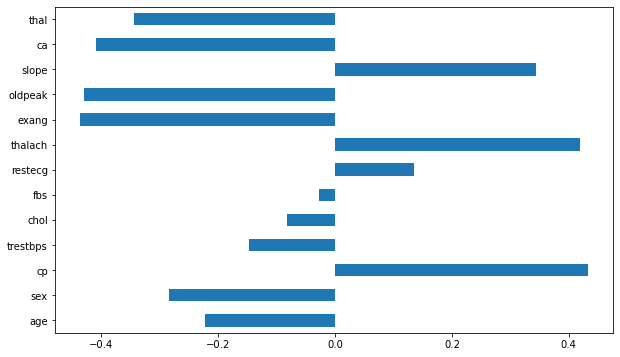

In [17]:
# realations of each columns with target
df.corr()['target'].drop('target').plot.barh()

# Data Preprocessing

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

In [19]:
# Specify target and features
X = df.drop('target', axis =1)
y = df['target']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .105, random_state = 101)

In [157]:
scaler = StandardScaler()

In [158]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

- ***Default parameters***

In [160]:
log_model = LogisticRegression()

In [161]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
# y_pred

In [162]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
# y_pred_proba

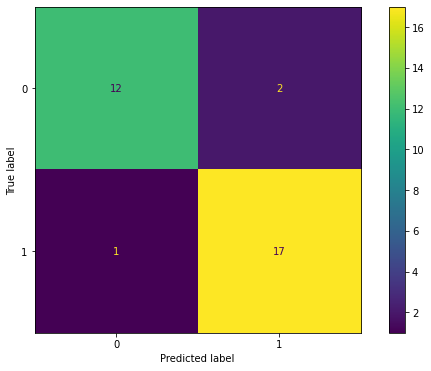

In [163]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [164]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.92        18

    accuracy                           0.91        32
   macro avg       0.91      0.90      0.90        32
weighted avg       0.91      0.91      0.91        32



- ***Let's check with cross Validate***

In [165]:
from sklearn.model_selection import cross_validate

In [166]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.819
test_precision_weighted   0.824
test_recall_weighted      0.819
test_f1_weighted          0.818
dtype: float64

The results of cross validate is for only label 1. And it's normal to be little bit smaller than above. Now let's find with best parameters by usiing **GridSearch**

- **Best Parameters By Using GridSearchCV***

In [167]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
# solver olarak gridsearch de tüm penaltı değerlerini kullanmak adına saga seçtik.
# ovr auto olabilirdi. Görmek için seçildi. auto seçersek multinominal seçer ve bütün hepsini bu datasette bilir.
# modelimde daha grid search yapmadan bile hyperparametreleri girdim.
# başlangıç için bazı hyperparametrelerimiz değiştirdik. Başlangıç olarak bunlarla çalışmak istedik.

In [168]:
penalty = ["l1", "l2", "elasticnet", "none"]
l1_ratio = np.linspace(0, 1, 20)  # l1_ratio'nun 0 la 1 arasında 20 tane eşit ara değer almasını istiyorum, 0 ve 1 de dahil.
C = np.logspace(0, 10, 20)       # C değerleri için 0 la 10 arasında 20 tane logaritmik değer almasını istiyorum.

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

# param_grid değişkenine GridSearchCV içinde hypterparametrelerin formatı nasıl ise aynı formatta parametreler tanımladım.
# ki aşağıda GridSearchCV() içinde bu parametreleri kullanacağım.

In [169]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [170]:
grid_model.fit(X_train_scaled,y_train)  # en iyi skor kombinasyonlarını verecek ve biz bet_params_ ile ona bakacağız.

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [171]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'none'}

In [172]:
y_pred = grid_model.predict(X_test_scaled)

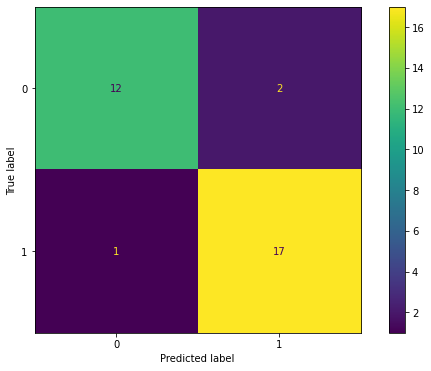

In [173]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
# log_model ile aynı sayılara sahip olduğunu gördüm. demek ki birşey değişmedi.

In [174]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.92        18

    accuracy                           0.91        32
   macro avg       0.91      0.90      0.90        32
weighted avg       0.91      0.91      0.91        32



In [175]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

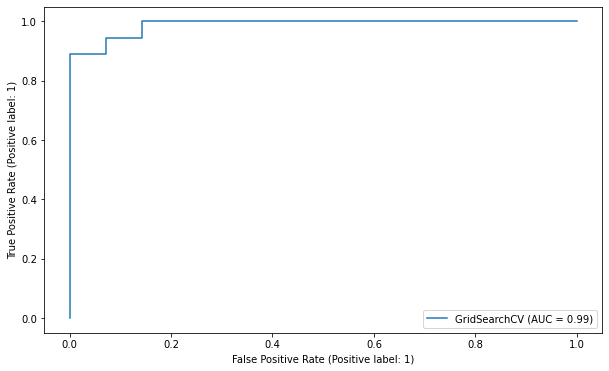

In [176]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

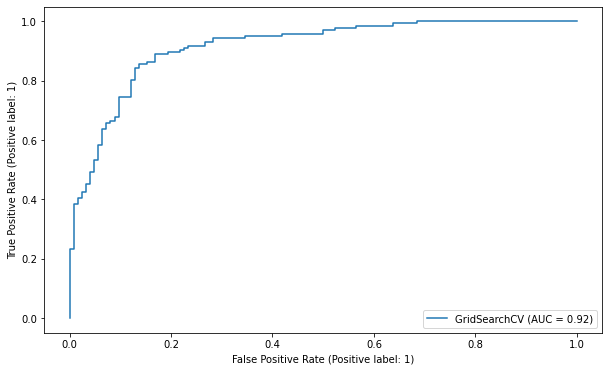

In [178]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

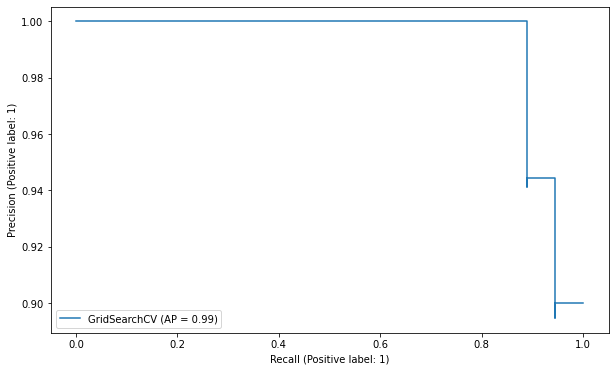

In [177]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

**Conc. : Default parameters and best parameters are giving same results**

# Implement KNN and Evaluate

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
# default is 5.

In [184]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [186]:
y_pred = knn_model.predict(X_test_scaled)

In [187]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [188]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
232,0,0,0.000,1.000
154,1,1,1.000,0.000
16,1,1,1.000,0.000
162,1,1,1.000,0.000
211,0,0,0.000,1.000
15,1,1,1.000,0.000
13,1,1,0.600,0.400
65,1,1,1.000,0.000
91,1,0,0.200,0.800
89,1,1,1.000,0.000


- **Model performance**

In [189]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

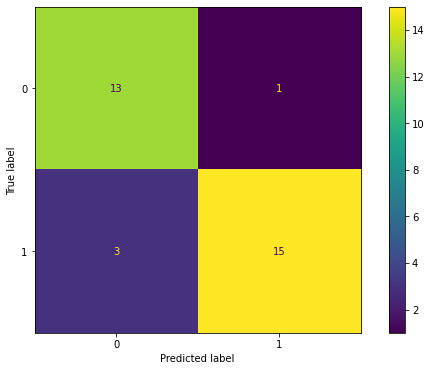

In [192]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [193]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.94      0.83      0.88        18

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.88        32



- **Elbow Method for Choosing Reasonable K Values**

In [194]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [197]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

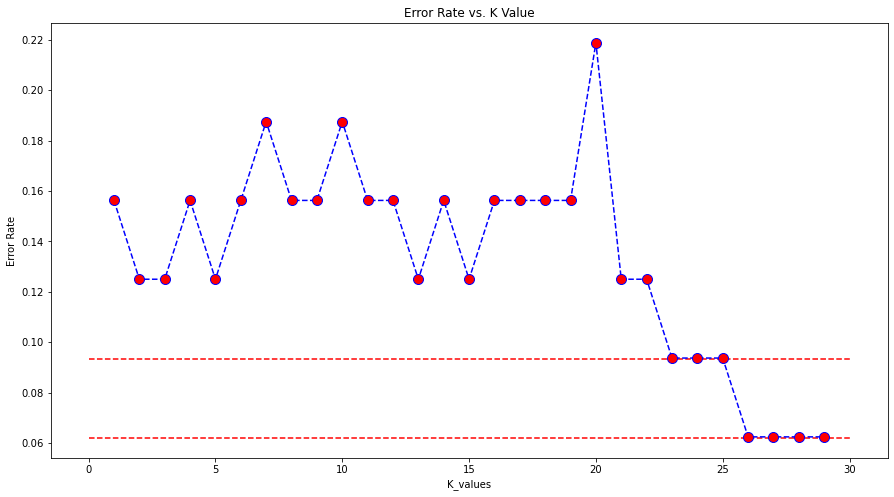

In [203]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.062, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.0935, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

# x değeri olarak 1 den 30 kadar range yaptım. y olarak da test error rates leri atadım.

# amacım minimum error skorunu veren k sayısını bulmak.

# genel amacımız minimum kompleksiti ile maksimum verimi almaktı. o yüzden k sayısını optimum olarak belirlemeliyim

- 0.0935 hata demek %91 accuracy demek. 0.062 hata ise %94 accuracy demek. sorulacak soru şu. %3 bir fark için modelimin kompleksitisini arttırmaya değer mi? 

- Kabul edilebilir hata miktarına karşılık gelen minimum komşu sayısını belirlemem lazım.

- Elbow metoduna göre kabul edilebilir hata miktarına göre minimum k sayısını belirlemek.
- 0.09 çizgisindeki ilk kırmızı nokta 23. k oluyor. ikinci nokta 24. k sayısıdır. 0.06 çizgisindeki k sayısı ise 26 dir. ben burda 23 u tercih edebilirim. 

- **Scores by Various K Values**

In [225]:
# K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=2


[[14  0]
 [ 4 14]]


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.78      0.88        18

    accuracy                           0.88        32
   macro avg       0.89      0.89      0.88        32
weighted avg       0.90      0.88      0.88        32



In [223]:
# Default K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH DEFAULT K=5')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH DEFAULT K=5


[[13  1]
 [ 3 15]]


              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.94      0.83      0.88        18

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.88        32



In [213]:
# K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=23


[[11  3]
 [ 0 18]]


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.86      1.00      0.92        18

    accuracy                           0.91        32
   macro avg       0.93      0.89      0.90        32
weighted avg       0.92      0.91      0.90        32



- This is over fit

In [216]:
# K=26
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=26


[[12  2]
 [ 0 18]]


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.90      1.00      0.95        18

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32



* This is over fit

- **Cross Validate For 23 AS K Value**

In [217]:
from sklearn.model_selection import cross_val_score, cross_validate

In [228]:
model = KNeighborsClassifier(n_neighbors=23)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [229]:
df_scores.mean()[2:]

test_accuracy    0.826
test_precision   0.795
test_recall      0.925
test_f1          0.853
dtype: float64

- **Gridsearch Method for Choosing Reasonable K Values**

In [230]:
from sklearn.model_selection import GridSearchCV

In [231]:
knn_grid = KNeighborsClassifier()

# KNeighborsClassifier() fonksiyonundaki parametrelerden en önemlisi n_neighbors dur. bununla mutlaka oynamak gerekir.

# p = 1 manhatten, p = 2 öklit. 

In [232]:
k_values= range(1,30)

In [233]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [234]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

# datam dengeli olduğu için skor için accuracy ye bakıyorum.

# girdiğim parametreleri 10 defa skorluyor ve en iyi parametreler hangileri ise bana onu döndürüyor.

In [236]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [237]:
knn_grid_model.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

GridSearchCV() en iyi parametreleri bana getiriyor ama hesaplama maliyetlerimi hesaba katmıyor. Bu değerlendirmeyi biz yapmalıyız ki  en küçük %'lik iyileştirme için modelimi çok komplex hale getirmesin.

- **K=14** This is my final choice. Because I checked with **gridsearchcv** --> **best params with cross validate**

In [239]:
# NOW WITH K=14
knn = KNeighborsClassifier(n_neighbors=14, p =1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=14


[[13  1]
 [ 3 15]]


              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.94      0.83      0.88        18

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.88        32



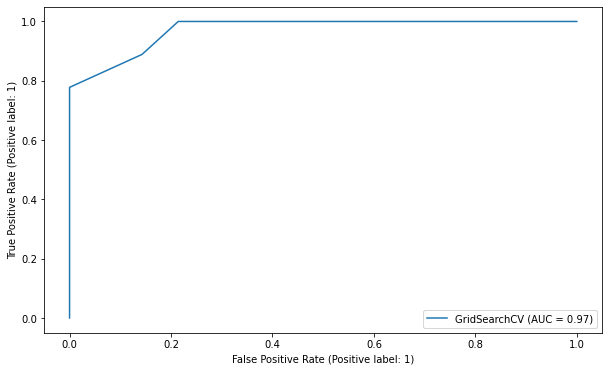

In [240]:
plot_roc_curve(knn_grid_model, X_test_scaled, y_test);

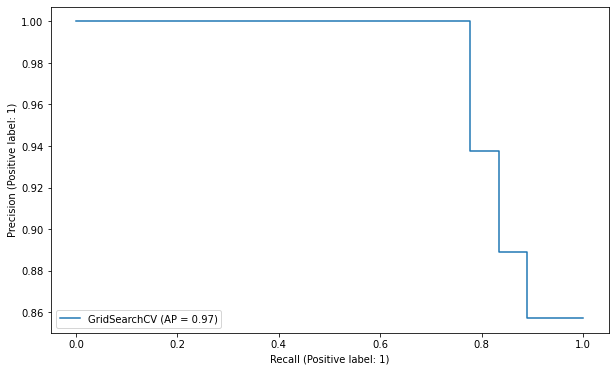

In [241]:
plot_precision_recall_curve(knn_grid_model, X_test_scaled, y_test);

# Implement SVM and Evaluate

- **At this model i will directly try to find best params**

In [291]:
from sklearn.model_selection import GridSearchCV

In [292]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['linear','rbf','sigmoid','poly'],
              'degree':[1,2]}

In [293]:
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [294]:
svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV 1/5] END ....C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ....C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ....C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ....C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ....C=0.1, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END .......C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .......C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .......C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .......C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .......C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=0.1, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...C=0.1, degree=1, gamma=scale,

[CV 4/5] END ...C=0.1, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...C=0.1, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ......C=0.1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END ......C=0.1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5] END ......C=0.1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 4/5] END ......C=0.1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 5/5] END ......C=0.1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 1/5] END ...C=0.1, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 2/5] END ...C=0.1, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 3/5] END ...C=0.1, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 4/5] END ...C=0.1, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 5/5] END ...C=0.1, degree=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 1/5] END ......C=0.1, de

[CV 3/5] END .....C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END .....C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END .....C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ........C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ........C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ........C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ........C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ........C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ....C=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ....C=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ....C=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ....C=0.1, degr

[CV 4/5] END ........C=1, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ........C=1, degree=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ...........C=1, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...........C=1, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...........C=1, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...........C=1, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...........C=1, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .......C=1, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .......C=1, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .......C=1, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .......C=1, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .......C=1, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..........C=1, 

[CV 1/5] END ......C=1, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ......C=1, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ......C=1, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ......C=1, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ......C=1, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .........C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/5] END .........C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/5] END .........C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 4/5] END .........C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 5/5] END .........C=1, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/5] END ..........C=1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..........C=1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..........C=1, 

[CV 5/5] END ........C=10, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ....C=10, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ....C=10, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ....C=10, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ....C=10, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .......C=10, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END .......C=10, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END .......C=10, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END .......C=10, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END .......C=10, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END ......C=10, degree=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END ......C=10, deg

[CV 2/5] END .......C=10, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END .......C=10, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END .......C=10, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END .......C=10, degree=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...C=10, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...C=10, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...C=10, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...C=10, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...C=10, degree=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ......C=10, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 2/5] END ......C=10, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 3/5] END ......C=10, degree=1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 4/5] END ......C=10, deg

[CV 3/5] END .....C=10, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END .....C=10, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END .....C=10, degree=2, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ........C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ........C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ........C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ........C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ........C=10, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=10, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ....C=10, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ....C=10, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ....C=10, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ....C=10, degre

[CV 2/5] END .........C=100, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .........C=100, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .........C=100, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .........C=100, degree=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=100, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .....C=100, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .....C=100, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .....C=100, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .....C=100, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ........C=100, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END ........C=100, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END ........C=100, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END ........C=100, 

[CV 4/5] END ....C=100, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ....C=100, degree=2, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .......C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/5] END .......C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/5] END .......C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 4/5] END .......C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 5/5] END .......C=100, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/5] END ........C=100, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV 2/5] END ........C=100, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ........C=100, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ........C=100, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV 5/5] END ........C=100, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...........C=10

[CV 3/5] END .....C=100, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 4/5] END .....C=100, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 5/5] END .....C=100, degree=2, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 1/5] END ...C=1000, degree=1, gamma=scale, kernel=linear; total time=   2.1s
[CV 2/5] END ...C=1000, degree=1, gamma=scale, kernel=linear; total time=   1.1s
[CV 3/5] END ...C=1000, degree=1, gamma=scale, kernel=linear; total time=   1.0s
[CV 4/5] END ...C=1000, degree=1, gamma=scale, kernel=linear; total time=   1.0s
[CV 5/5] END ...C=1000, degree=1, gamma=scale, kernel=linear; total time=   0.7s
[CV 1/5] END ......C=1000, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END ......C=1000, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END ......C=1000, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END ......C=1000, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END ......C=1000, d

[CV 1/5] END ...C=1000, degree=1, gamma=0.001, kernel=linear; total time=   1.3s
[CV 2/5] END ...C=1000, degree=1, gamma=0.001, kernel=linear; total time=   0.8s
[CV 3/5] END ...C=1000, degree=1, gamma=0.001, kernel=linear; total time=   0.8s
[CV 4/5] END ...C=1000, degree=1, gamma=0.001, kernel=linear; total time=   0.8s
[CV 5/5] END ...C=1000, degree=1, gamma=0.001, kernel=linear; total time=   0.6s
[CV 1/5] END ......C=1000, degree=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ......C=1000, degree=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ......C=1000, degree=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ......C=1000, degree=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ......C=1000, degree=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..C=1000, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..C=1000, degree=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..C=1000, degre

[CV 3/5] END .....C=1000, degree=2, gamma=0.1, kernel=linear; total time=   0.9s
[CV 4/5] END .....C=1000, degree=2, gamma=0.1, kernel=linear; total time=   0.9s
[CV 5/5] END .....C=1000, degree=2, gamma=0.1, kernel=linear; total time=   0.8s
[CV 1/5] END ........C=1000, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ........C=1000, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ........C=1000, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ........C=1000, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ........C=1000, degree=2, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=1000, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ....C=1000, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ....C=1000, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ....C=1000, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ....C=1000, deg

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=3)

In [295]:
svm_model_grid.best_params_

{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [296]:
svm_model_grid.best_estimator_

SVC(C=10, degree=1, kernel='linear')

In [297]:
y_pred = svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.92        18

    accuracy                           0.91        32
   macro avg       0.91      0.90      0.90        32
weighted avg       0.91      0.91      0.91        32



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 

In [298]:
final_X_scaled = scaler.fit_transform(X)

In [299]:
final_model = SVC(C = 10, degree =  1, gamma= 'scale', kernel=  'linear')

In [300]:
final_model.fit(final_X_scaled,y)

SVC(C=10, degree=1, kernel='linear')

In [303]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [304]:
values = [[25,0,2,180,200,0,0,200,1,1.8,1,1,0]]

In [305]:
final_model.predict(values)

array([1], dtype=int64)